In [3]:
import os
import cv2
import dlib
from time import time
import matplotlib.pyplot as plt

In [4]:
########################################################################################################################
 
# Load a model stored in Caffe framework's format using the architecture and the layers weights file stored in the disk.
opencv_dnn_model = cv2.dnn.readNetFromCaffe(prototxt="/content/deploy.prototxt",
                                            caffeModel="/content/res10_300x300_ssd_iter_140000_fp16.caffemodel")
 
########################################################## OR ##########################################################
 
# Load a model stored in TensorFlow framework's format using the architecture and the layers weights file stored in the disk
# opencv_dnn_model = cv2.dnn.readNetFromTensorflow(model="models/opencv_face_detector_uint8.pb", 
#                                                  config="models/opencv_face_detector.pbtxt")
 
########################################################################################################################
opencv_dnn_model

< cv2.dnn.Net 0x7f9710da1f90>

In [6]:
def cvDnnDetectFaces(image, opencv_dnn_model, min_confidence=0.5, display = True):
    '''
    This function performs face(s) detection on an image using opencv deep learning based face detector.
    Args:
        image:               The input image of the person(s) whose face needs to be detected.
        opencv_dnn_model:    The pre-trained opencv deep learning based face detection model loaded from the disk 
                             required to perform the detection.
        min_confidence:      The minimum detection confidence required to consider the face detection model's 
                             prediction correct.
        display:             A boolean value that is if set to true the function displays the original input image, 
                             and the output image with the bounding boxes drawn, confidence scores, and time taken 
                             written and returns nothing.
    Returns:
        output_image: A copy of input image with the bounding boxes drawn and confidence scores written.
        results:      The output of the face detection process on the input image.
    '''
    
    # Get the height and width of the input image.
    image_height, image_width, _ = image.shape
    
    # Create a copy of the input image to draw bounding boxes and write confidence scores.
    output_image = image.copy()
    
    # Perform the required pre-processings on the image and create a 4D blob from image.
    # Resize the image and apply mean subtraction to its channels
    # Also convert from BGR to RGB format by swapping Blue and Red channels.
    preprocessed_image = cv2.dnn.blobFromImage(image, scalefactor=1.0, size=(300, 300),
                                               mean=(104.0, 117.0, 123.0), swapRB=False, crop=False)
 
    # Set the input value for the model.
    opencv_dnn_model.setInput(preprocessed_image)
 
    # Get the current time before performing face detection.
    start = time()
 
    # Perform the face detection on the image.
    results = opencv_dnn_model.forward()    
 
    # Get the current time after performing face detection.
    end = time()
        
    # Loop through each face detected in the image.
    for face in results[0][0]:
        
        # Retrieve the face detection confidence score.
        face_confidence = face[2]
        
        # Check if the face detection confidence score is greater than the thresold.
        if face_confidence >= min_confidence:
            
            # Retrieve the bounding box of the face.
            bbox = face[3:]
            
            # Retrieve the bounding box coordinates of the face and scale them according to the original size of the image.
            x1 = int(bbox[0] * image_width)
            y1 = int(bbox[1] * image_height)
            x2 = int(bbox[2] * image_width)
            y2 = int(bbox[3] * image_height)
 
            # Draw a bounding box around a face on the copy of the image using the retrieved coordinates.
            cv2.rectangle(output_image, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=image_width//200)
            
            # Draw a filled rectangle near the bounding box of the face.
            # We are doing it to change the background of the confidence score to make it easily visible.
            cv2.rectangle(output_image, pt1=(x1, y1-image_width//20), pt2=(x1+image_width//16, y1),
                          color=(0, 255, 0), thickness=-1)
 
            # Write the confidence score of the face near the bounding box and on the filled rectangle. 
            cv2.putText(output_image, text=str(round(face_confidence, 1)), org=(x1, y1-25), 
                        fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=image_width//700,
                        color=(255,255,255), thickness=image_width//200)
    
    # Check if the original input image and the output image are specified to be displayed.
    if display:
        
        # Write the time take by face detection process on the output image. 
        cv2.putText(output_image, text='Time taken: '+str(round(end - start, 2))+' Seconds.', org=(10, 65),
                    fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=image_width//700,
                    color=(0,0,255), thickness=image_width//500)
        
        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');
        
    # Otherwise
    else:
        
        # Return the output image and results of face detection.
        return output_image, results 

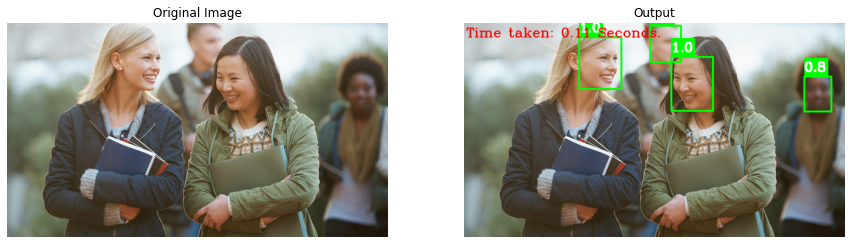

In [7]:
# Read a sample image and perform OpenCV dnn face detection on it.
image = cv2.imread('/content/593186682300003b0034875d.jpeg')
cvDnnDetectFaces(image, opencv_dnn_model, display=True)

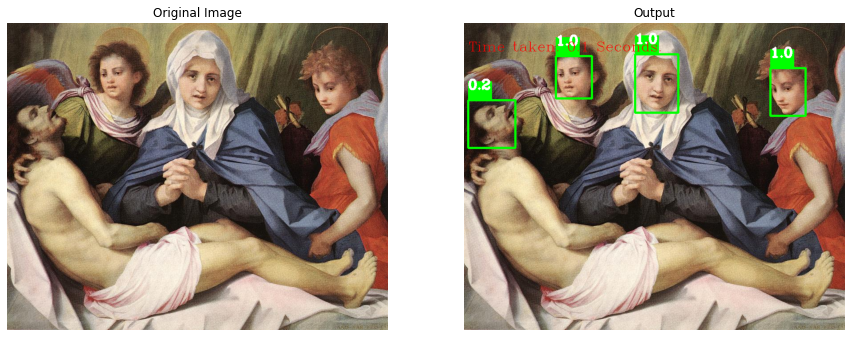

In [13]:
image = cv2.imread('/content/andrea-del-sarto_lament-of-christ.jpg')
cvDnnDetectFaces(image, opencv_dnn_model, min_confidence=0.15,display=True)

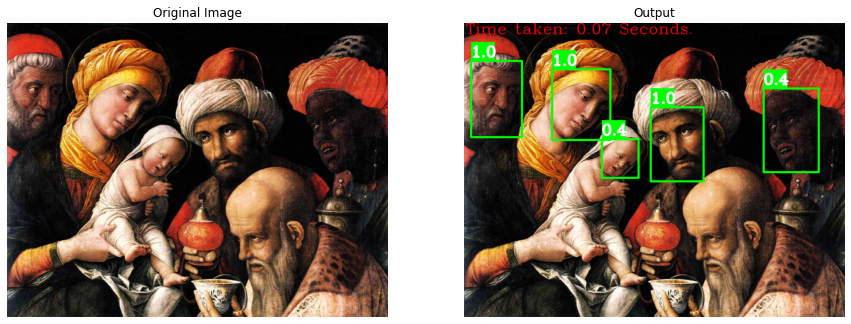

In [19]:
image = cv2.imread('/content/andrea-mantegna_adoration-of-the-magi-1500.jpg')
cvDnnDetectFaces(image, opencv_dnn_model, min_confidence=0.3,display=True)

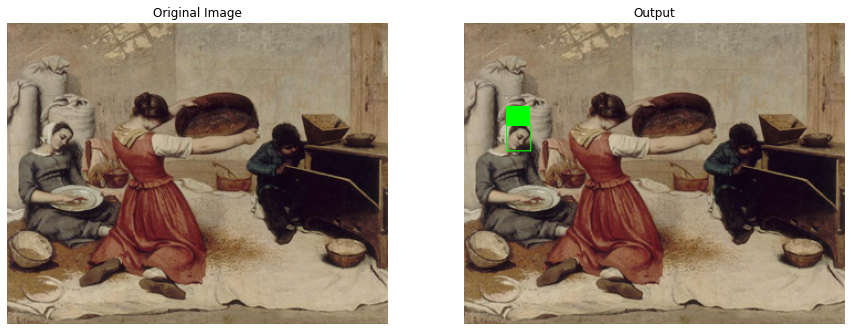

In [15]:
image = cv2.imread('/content/test_detec.jpg')
cvDnnDetectFaces(image, opencv_dnn_model, min_confidence=0.15,display=True)

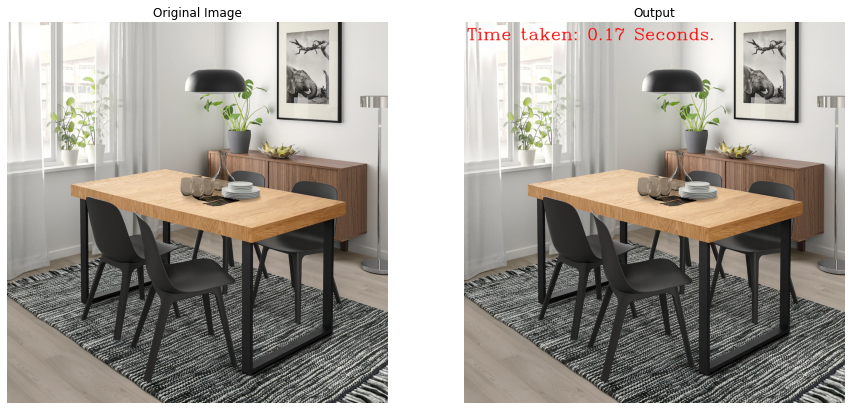

In [16]:
image = cv2.imread('/content/tarsele-table-extensible-plaque-chene-noir__0944977_pe797515_s5.jpg')
cvDnnDetectFaces(image, opencv_dnn_model, min_confidence=0.15,display=True)

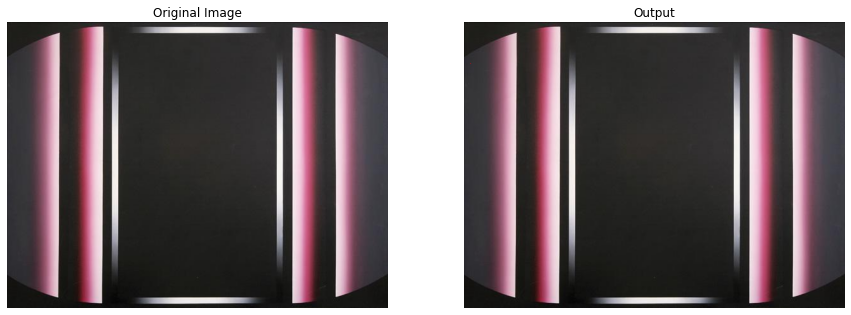

In [22]:
image = cv2.imread('/content/abst1.jpg')
cvDnnDetectFaces(image, opencv_dnn_model, min_confidence=0.2,display=True)

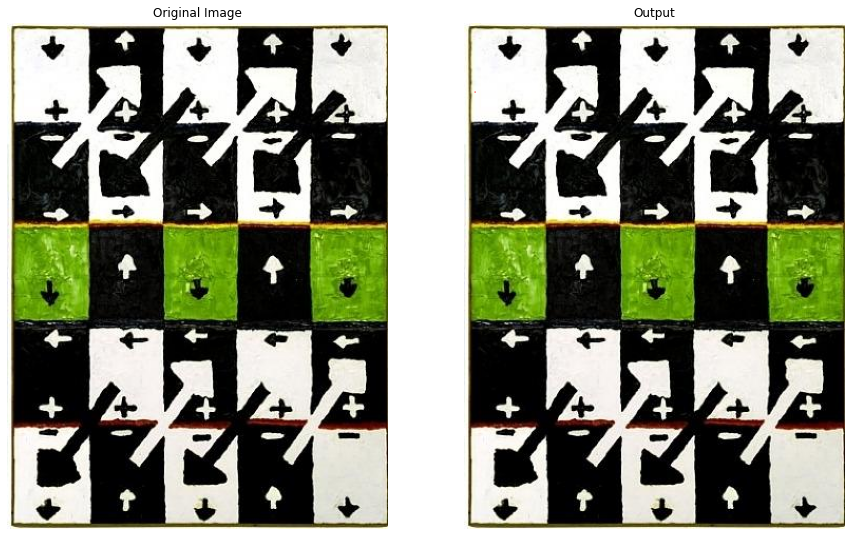

In [20]:
image = cv2.imread('/content/abst2.jpg')
cvDnnDetectFaces(image, opencv_dnn_model, min_confidence=0.2,display=True)